# PCA on MNIST Handwritten Digits

__Why__ To have hands-on on PCA

__Reference__ None. Just for my own practice/ understanding

In [1]:
# import required modules

import numpy as np
import pandas as pd # for dataframe
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Load dataset

In [2]:
df = pd.read_csv('../../AAIC-Course/datasets/mnist-digits-dataset/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# remove labels from the data set
df_labels = df['label']
df_data = df.drop(['label'],axis=1)
print(df_labels.shape,df_data.shape)

(42000,) (42000, 784)


In [5]:
# Column Standardize the data
standardized_data = StandardScaler().fit_transform(df_data.astype(np.float64))
print(type(standardized_data))
print(standardized_data.shape)
standardized_data[:4]

<class 'numpy.ndarray'>
(42000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
# PCA
pca = PCA()
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)
pca_data.shape

(42000, 2)

In [7]:
# Add Labels
new_data = np.vstack((pca_data.T,df_labels)).T
new_data.shape

(42000, 3)

In [8]:
new_df = pd.DataFrame(new_data,columns=['PC1','PC2','label'])
new_df.head()

,PC1,PC2,label
0,-5.140439,-5.226065,1.0
1,19.292325,6.032746,0.0
2,-7.644531,-1.706225,1.0
3,-0.474218,5.836538,4.0
4,26.559572,6.024764,0.0


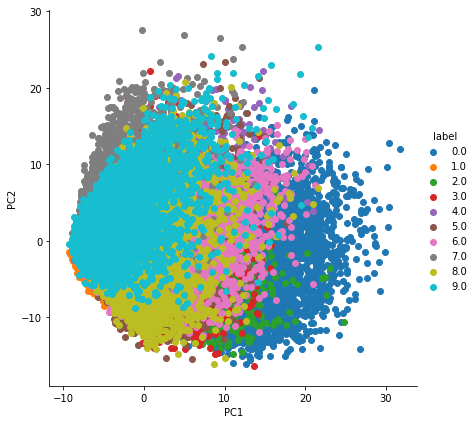

In [9]:
sns.FacetGrid(new_df,hue='label',height=6).map(plt.scatter, 'PC1', 'PC2').add_legend()